In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Data

In [ ]:
Data is taken from: 
- Butlin (see econhist repoistory) - for some consistent columns from 1924
- ANU election surveys
- Australian Bureau of Statistics
- Fair Work Commission - taking their minimum wage table as the UnskillWage and their Fitter Wage as the ProdWage for the first pass

In [12]:
data = pd.read_csv('../data/cliodynamics_use.csv')

In [13]:
data

,year,ProdWage,UnskillWage,Population,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI
0,1924,11.813947,348.23,5882002.0,13900.0,0.033926,0.624512,0.157055,2.36,51.0,NaN,NaN,NaN
1,1925,12.145263,360.82,6003027.0,14700.0,0.033660,0.626047,0.157454,2.43,51.0,NaN,NaN,NaN
2,1926,12.145263,363.06,6124020.0,14600.0,0.033452,0.627582,0.157723,2.42,51.0,NaN,NaN,NaN
3,1927,12.227105,365.06,6251016.0,14800.0,0.033493,0.629116,0.159254,2.42,51.0,NaN,NaN,NaN
4,1928,12.117895,360.92,6355770.0,14500.0,0.033575,0.630651,0.161365,2.45,51.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
####   Variables
# ProdWage = nominal hourly wage of production workers (source: MeasuringWorth, Officer and Williamson 2013)
# UnskillWage = nominal wage of production workers (source: MeasuringWorth, scaled to 1 in 1860)
# GDPpc = nominal GDP per capita in nominal (source: MeasuringWorth)
# RelWage = relative wage, to be calculated 
# Urbanization = percent of population in urban places (source: Hist Stats of the US, Carter et al. 2004)
# A20_29 = percent of population in the age cohort 20-29 years (source: US Census Bureau, includes the forecast to 2020)
# RelDebt = national debt scaled by GDP (source: US Dept of the Treasury)
# Distrust = percent responding negatively to the government trust question (source: Pew Research Center)

################    Parameters
w_0 = 1
mu_0 = 0.1
Lambda = 0.5 

In [14]:
################    Calculate RelWage, averaging production and unskilled wages, scaled to 1 in 1980
data['RelWage1'] = data['ProdWage']/data['GDPpc']
data['RelWage1'] = data['RelWage1'].divide(data['RelWage1'].loc[data['year'] == 1980].values[0])
data['RelWage2'] = data['UnskillWage']/data['GDPpc']
data['RelWage2'] = data['RelWage2'].divide(data['RelWage2'].loc[data['year'] == 1980].values[0])
data['RelWage'] = (data['RelWage1']+data['RelWage2'])/2


In [15]:
data

,year,ProdWage,UnskillWage,Population,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2
0,1924,11.813947,348.23,5882002.0,13900.0,1.346298,0.624512,0.157055,2.36,51.0,NaN,NaN,NaN,1.350980,1.341616
1,1925,12.145263,360.82,6003027.0,14700.0,1.313876,0.626047,0.157454,2.43,51.0,NaN,NaN,NaN,1.313283,1.314468
2,1926,12.145263,363.06,6124020.0,14600.0,1.326983,0.627582,0.157723,2.42,51.0,NaN,NaN,NaN,1.322278,1.331688
3,1927,12.227105,365.06,6251016.0,14800.0,1.317064,0.629116,0.159254,2.42,51.0,NaN,NaN,NaN,1.313199,1.320929
4,1928,12.117895,360.92,6355770.0,14500.0,1.330682,0.630651,0.161365,2.45,51.0,NaN,NaN,NaN,1.328397,1.332968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#data_regression = data.loc[data['year'] > 1960]['year','RelWage']
data_regression = data.loc[data['year'] > 1960][['year','RelWage']]
data_regression = data_regression.loc[data['year'] < 2011]
#data_regression

In [17]:
reg = LinearRegression().fit(data_regression['year'].values.reshape(-1,1), data_regression['RelWage'])

In [18]:
reg.score(data_regression['year'].values.reshape(-1,1), data_regression['RelWage'])

0.6854322499357751

In [19]:
print(reg.coef_,reg.intercept_)

[-0.00989248] 20.475492844939392


In [20]:
RelWage2011 = reg.predict(data['year'][data['year'] > 2010].values.reshape(-1,1))
RelWage2011

array([0.58172382, 0.57183135, 0.56193887, 0.5520464 , 0.54215392,
       0.53226144, 0.52236897, 0.51247649, 0.50258402, 0.49269154])

In [21]:
data.loc[data['year'] > 2010, 'RelWage'] = RelWage2011

In [22]:
data_regression = data.loc[data['year'] > 1980][['year','RelDebt']]
data_regression = data_regression.loc[data['year'] < 2011]
#data_regression

In [23]:
reg2 = LinearRegression().fit(data_regression['year'].values.reshape(-1,1), data_regression['RelDebt'])

In [24]:
print(reg2.coef_,reg2.intercept_)

[2.12342603] -4172.743307378568


In [25]:
RelDebt2011 = reg2.predict(data['year'][data['year'] >= 2011].values.reshape(-1,1))

In [26]:
data.loc[data['year'] > 2010, 'RelDebt'] = RelDebt2011

In [260]:
scaler3 = [data.loc[data['year'] == 1958][['Distrust']].values[0][0]] * data.loc[data['year'] < 1958]['Distrust'].shape[0]
data.loc[data['year'] < 1958, 'Distrust'] = scaler3
data.head(data.loc[data['year'] < 1958]['Distrust'].shape[0])

,year,ProdWage,UnskillWage,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2
0,1945,1.06,813.0,1593.68,0.916066,60.739698,17.032527,116.000981,28.861407,NaN,NaN,NaN,0.892906,0.939226
1,1946,1.13,900.0,1571.55,1.009825,61.554404,16.901523,121.252070,28.861407,NaN,NaN,NaN,0.965275,1.054374
2,1947,1.30,1017.0,1693.66,1.067985,62.307657,16.550344,105.811710,28.861407,NaN,NaN,NaN,1.030429,1.105542
3,1948,1.41,1087.0,1835.22,1.060951,62.955541,16.332707,93.754086,28.861407,NaN,NaN,NaN,1.031411,1.090491
4,1949,1.46,1131.0,1791.03,1.128481,63.479053,16.055473,94.599686,28.861407,NaN,NaN,NaN,1.094336,1.162627
5,1950,1.55,1184.0,1936.26,1.100237,63.881127,15.788904,87.625929,28.861407,NaN,NaN,NaN,1.074654,1.125819
6,1951,1.72,1283.0,2199.15,1.062041,64.241073,15.397324,75.220152,28.861407,NaN,NaN,NaN,1.049964,1.074119
7,1952,1.83,1358.0,2282.83,1.085699,64.709584,14.939401,72.315149,28.861407,NaN,NaN,NaN,1.076164,1.095234
8,1953,1.94,1450.0,2377.09,1.109336,65.289167,14.479555,72.546301,28.861407,NaN,NaN,NaN,1.095612,1.123060
9,1954,1.97,1521.0,2342.49,1.162220,65.962686,13.994580,73.278079,28.861407,NaN,NaN,NaN,1.128988,1.195452


In [27]:
data_regression = data.loc[data['year'] > 1980][['year','Distrust']]
data_regression = data_regression.loc[data['year'] < 2011]
#data_regression

In [28]:
reg3 = LinearRegression().fit(data_regression['year'].values.reshape(-1,1), data_regression['Distrust'])

In [29]:
Distrust2011 = reg3.predict(data['year'][data['year'] >= 2011].values.reshape(-1,1))

In [31]:
data.loc[data['year'] > 2010, 'Distrust'] = Distrust2011

In [32]:
data

,year,ProdWage,UnskillWage,Population,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2
0,1924,11.813947,348.23,5882002.0,13900.0,1.346298,0.624512,0.157055,2.360000,51.000000,NaN,NaN,NaN,1.350980,1.341616
1,1925,12.145263,360.82,6003027.0,14700.0,1.313876,0.626047,0.157454,2.430000,51.000000,NaN,NaN,NaN,1.313283,1.314468
2,1926,12.145263,363.06,6124020.0,14600.0,1.326983,0.627582,0.157723,2.420000,51.000000,NaN,NaN,NaN,1.322278,1.331688
3,1927,12.227105,365.06,6251016.0,14800.0,1.317064,0.629116,0.159254,2.420000,51.000000,NaN,NaN,NaN,1.313199,1.320929
4,1928,12.117895,360.92,6355770.0,14500.0,1.330682,0.630651,0.161365,2.450000,51.000000,NaN,NaN,NaN,1.328397,1.332968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2016,NaN,NaN,NaN,NaN,0.532261,NaN,NaN,108.083567,44.607793,NaN,NaN,NaN,NaN,NaN
93,2017,NaN,NaN,NaN,NaN,0.522369,NaN,NaN,110.206993,45.030551,NaN,NaN,NaN,NaN,NaN
94,2018,NaN,NaN,NaN,NaN,0.512476,NaN,NaN,112.330419,45.453309,NaN,NaN,NaN,NaN,NaN
95,2019,NaN,NaN,NaN,NaN,0.502584,NaN,NaN,114.453845,45.876067,NaN,NaN,NaN,NaN,NaN


In [45]:
data_regression = data.loc[data['year'] > 1980][['year','Urbanization']]
data_regression = data_regression.loc[data['year'] < 2011]
reg4 = LinearRegression().fit(data_regression['year'].values.reshape(-1,1), data_regression['Urbanization'])
Urbanization2011 = reg4.predict(data['year'][data['year'] >= 2011].values.reshape(-1,1))
data.loc[data['year'] > 2010, 'Urbanization'] = Urbanization2011

In [46]:
data

,year,ProdWage,UnskillWage,Population,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2
0,1924,11.813947,348.23,5882002.0,13900.0,1.346298,0.624512,0.157055,2.360000,0.510000,1.000000,1.000000,0.087687,1.350980,1.341616
1,1925,12.145263,360.82,6003027.0,14700.0,1.313876,0.626047,0.157454,2.430000,0.510000,0.974278,1.077309,0.084086,1.313283,1.314468
2,1926,12.145263,363.06,6124020.0,14600.0,1.326983,0.627582,0.157723,2.420000,0.510000,0.950388,1.083291,0.080769,1.322278,1.331688
3,1927,12.227105,365.06,6251016.0,14800.0,1.317064,0.629116,0.159254,2.420000,0.510000,0.925747,1.128516,0.077017,1.313199,1.320929
4,1928,12.117895,360.92,6355770.0,14500.0,1.330682,0.630651,0.161365,2.450000,0.510000,0.901674,1.135541,0.075877,1.328397,1.332968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2016,NaN,NaN,NaN,NaN,0.532261,0.892120,NaN,108.083567,0.446078,2.038799,1.101271,NaN,NaN,NaN
93,2017,NaN,NaN,NaN,NaN,0.522369,0.893369,NaN,110.206993,0.450306,2.126677,1.062881,NaN,NaN,NaN
94,2018,NaN,NaN,NaN,NaN,0.512476,0.894618,NaN,112.330419,0.454533,2.218112,1.025889,NaN,NaN,NaN
95,2019,NaN,NaN,NaN,NaN,0.502584,0.895867,NaN,114.453845,0.458761,2.313243,0.990242,NaN,NaN,NaN


In [49]:
data_regression = data.loc[data['year'] > 1980][['year','Age20_29']]
data_regression = data_regression.loc[data['year'] < 2011]
reg5 = LinearRegression().fit(data_regression['year'].values.reshape(-1,1), data_regression['Age20_29'])
Age2011 = reg5.predict(data['year'][data['year'] >= 2011].values.reshape(-1,1))
data.loc[data['year'] > 2010, 'Age20_29'] = Age2011

In [50]:
data

,year,ProdWage,UnskillWage,Population,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2
0,1924,11.813947,348.23,5882002.0,13900.0,1.346298,0.624512,0.157055,2.360000,0.510000,1.000000,1.000000,0.087687,1.350980,1.341616
1,1925,12.145263,360.82,6003027.0,14700.0,1.313876,0.626047,0.157454,2.430000,0.510000,0.974278,1.077309,0.084086,1.313283,1.314468
2,1926,12.145263,363.06,6124020.0,14600.0,1.326983,0.627582,0.157723,2.420000,0.510000,0.950388,1.083291,0.080769,1.322278,1.331688
3,1927,12.227105,365.06,6251016.0,14800.0,1.317064,0.629116,0.159254,2.420000,0.510000,0.925747,1.128516,0.077017,1.313199,1.320929
4,1928,12.117895,360.92,6355770.0,14500.0,1.330682,0.630651,0.161365,2.450000,0.510000,0.901674,1.135541,0.075877,1.328397,1.332968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2016,NaN,NaN,NaN,NaN,0.532261,0.892120,0.126356,108.083567,0.446078,2.038799,1.101271,NaN,NaN,NaN
93,2017,NaN,NaN,NaN,NaN,0.522369,0.893369,0.125071,110.206993,0.450306,2.126677,1.062881,NaN,NaN,NaN
94,2018,NaN,NaN,NaN,NaN,0.512476,0.894618,0.123785,112.330419,0.454533,2.218112,1.025889,NaN,NaN,NaN
95,2019,NaN,NaN,NaN,NaN,0.502584,0.895867,0.122499,114.453845,0.458761,2.313243,0.990242,NaN,NaN,NaN


In [51]:
########  Calculate e and epsilon
data.loc[data['year'] == 1924, 'elite'] = 1

In [52]:
for t in range(1,data.shape[0]):
    data.at[t,'elite'] = data.iloc[t-1]['elite'] + mu_0*(w_0 - data.iloc[t-1]['RelWage'])/data.iloc[t-1]['RelWage']

In [53]:
data

,year,ProdWage,UnskillWage,Population,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2
0,1924,11.813947,348.23,5882002.0,13900.0,1.346298,0.624512,0.157055,2.360000,0.510000,1.000000,1.000000,0.087687,1.350980,1.341616
1,1925,12.145263,360.82,6003027.0,14700.0,1.313876,0.626047,0.157454,2.430000,0.510000,0.974278,1.077309,0.084086,1.313283,1.314468
2,1926,12.145263,363.06,6124020.0,14600.0,1.326983,0.627582,0.157723,2.420000,0.510000,0.950388,1.083291,0.080769,1.322278,1.331688
3,1927,12.227105,365.06,6251016.0,14800.0,1.317064,0.629116,0.159254,2.420000,0.510000,0.925747,1.128516,0.077017,1.313199,1.320929
4,1928,12.117895,360.92,6355770.0,14500.0,1.330682,0.630651,0.161365,2.450000,0.510000,0.901674,1.135541,0.075877,1.328397,1.332968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2016,NaN,NaN,NaN,NaN,0.532261,0.892120,0.126356,108.083567,0.446078,2.038799,1.101271,NaN,NaN,NaN
93,2017,NaN,NaN,NaN,NaN,0.522369,0.893369,0.125071,110.206993,0.450306,2.126677,1.062881,NaN,NaN,NaN
94,2018,NaN,NaN,NaN,NaN,0.512476,0.894618,0.123785,112.330419,0.454533,2.218112,1.025889,NaN,NaN,NaN
95,2019,NaN,NaN,NaN,NaN,0.502584,0.895867,0.122499,114.453845,0.458761,2.313243,0.990242,NaN,NaN,NaN


In [54]:
data['epsilon'] = (1 - Lambda*data['RelWage'])/data['elite']

In [55]:
data['epsilon']  = data['epsilon'].divide(data.iloc[0]['epsilon'])

In [56]:
data

,year,ProdWage,UnskillWage,Population,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2
0,1924,11.813947,348.23,5882002.0,13900.0,1.346298,0.624512,0.157055,2.360000,0.510000,1.000000,1.000000,0.087687,1.350980,1.341616
1,1925,12.145263,360.82,6003027.0,14700.0,1.313876,0.626047,0.157454,2.430000,0.510000,0.974278,1.077309,0.084086,1.313283,1.314468
2,1926,12.145263,363.06,6124020.0,14600.0,1.326983,0.627582,0.157723,2.420000,0.510000,0.950388,1.083291,0.080769,1.322278,1.331688
3,1927,12.227105,365.06,6251016.0,14800.0,1.317064,0.629116,0.159254,2.420000,0.510000,0.925747,1.128516,0.077017,1.313199,1.320929
4,1928,12.117895,360.92,6355770.0,14500.0,1.330682,0.630651,0.161365,2.450000,0.510000,0.901674,1.135541,0.075877,1.328397,1.332968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2016,NaN,NaN,NaN,NaN,0.532261,0.892120,0.126356,108.083567,0.446078,2.038799,1.101271,NaN,NaN,NaN
93,2017,NaN,NaN,NaN,NaN,0.522369,0.893369,0.125071,110.206993,0.450306,2.126677,1.062881,NaN,NaN,NaN
94,2018,NaN,NaN,NaN,NaN,0.512476,0.894618,0.123785,112.330419,0.454533,2.218112,1.025889,NaN,NaN,NaN
95,2019,NaN,NaN,NaN,NaN,0.502584,0.895867,0.122499,114.453845,0.458761,2.313243,0.990242,NaN,NaN,NaN


In [40]:
data['Distrust'] = data['Distrust'].divide(100)

In [41]:
data

,year,ProdWage,UnskillWage,Population,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2
0,1924,11.813947,348.23,5882002.0,13900.0,1.346298,0.624512,0.157055,2.360000,0.510000,1.000000,1.000000,NaN,1.350980,1.341616
1,1925,12.145263,360.82,6003027.0,14700.0,1.313876,0.626047,0.157454,2.430000,0.510000,0.974278,1.077309,NaN,1.313283,1.314468
2,1926,12.145263,363.06,6124020.0,14600.0,1.326983,0.627582,0.157723,2.420000,0.510000,0.950388,1.083291,NaN,1.322278,1.331688
3,1927,12.227105,365.06,6251016.0,14800.0,1.317064,0.629116,0.159254,2.420000,0.510000,0.925747,1.128516,NaN,1.313199,1.320929
4,1928,12.117895,360.92,6355770.0,14500.0,1.330682,0.630651,0.161365,2.450000,0.510000,0.901674,1.135541,NaN,1.328397,1.332968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2016,NaN,NaN,NaN,NaN,0.532261,NaN,NaN,108.083567,0.446078,2.038799,1.101271,NaN,NaN,NaN
93,2017,NaN,NaN,NaN,NaN,0.522369,NaN,NaN,110.206993,0.450306,2.126677,1.062881,NaN,NaN,NaN
94,2018,NaN,NaN,NaN,NaN,0.512476,NaN,NaN,112.330419,0.454533,2.218112,1.025889,NaN,NaN,NaN
95,2019,NaN,NaN,NaN,NaN,0.502584,NaN,NaN,114.453845,0.458761,2.313243,0.990242,NaN,NaN,NaN


In [57]:
data['PSI'] = 100*(1/data['RelWage'])*data['Urbanization']*data['Age20_29']*(data['elite']/data['epsilon'])*data['RelDebt']*data['Distrust'] 
data['PSI'] = data['PSI']/100

In [58]:
data

,year,ProdWage,UnskillWage,Population,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2
0,1924,11.813947,348.23,5882002.0,13900.0,1.346298,0.624512,0.157055,2.360000,0.510000,1.000000,1.000000,0.087687,1.350980,1.341616
1,1925,12.145263,360.82,6003027.0,14700.0,1.313876,0.626047,0.157454,2.430000,0.510000,0.974278,1.077309,0.084086,1.313283,1.314468
2,1926,12.145263,363.06,6124020.0,14600.0,1.326983,0.627582,0.157723,2.420000,0.510000,0.950388,1.083291,0.080769,1.322278,1.331688
3,1927,12.227105,365.06,6251016.0,14800.0,1.317064,0.629116,0.159254,2.420000,0.510000,0.925747,1.128516,0.077017,1.313199,1.320929
4,1928,12.117895,360.92,6355770.0,14500.0,1.330682,0.630651,0.161365,2.450000,0.510000,0.901674,1.135541,0.075877,1.328397,1.332968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2016,NaN,NaN,NaN,NaN,0.532261,0.892120,0.126356,108.083567,0.446078,2.038799,1.101271,18.903667,NaN,NaN
93,2017,NaN,NaN,NaN,NaN,0.522369,0.893369,0.125071,110.206993,0.450306,2.126677,1.062881,21.239414,NaN,NaN
94,2018,NaN,NaN,NaN,NaN,0.512476,0.894618,0.123785,112.330419,0.454533,2.218112,1.025889,23.854921,NaN,NaN
95,2019,NaN,NaN,NaN,NaN,0.502584,0.895867,0.122499,114.453845,0.458761,2.313243,0.990242,26.783383,NaN,NaN


<AxesSubplot:title={'center':'Political Stress Indicator - Australia'}, xlabel='year', ylabel='PSI'>

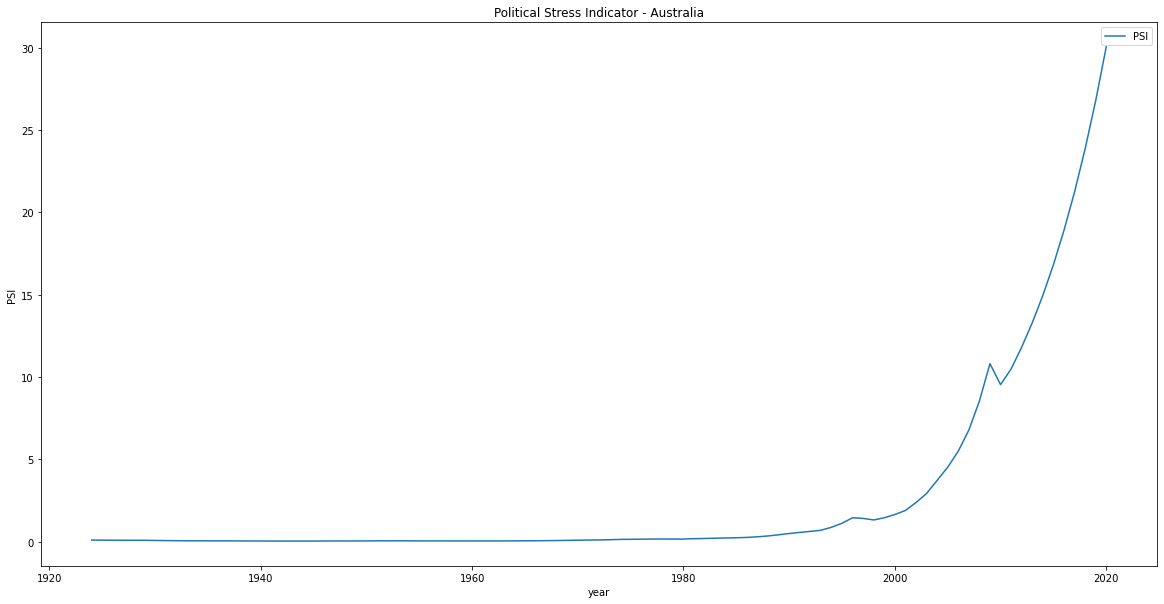

In [65]:
data.plot(x='year', y='PSI', title='Political Stress Indicator - Australia',xlabel='year', ylabel='PSI',  figsize=(20,10) )

### Results

So, we have a smaller number than the USA, but a very similar trend to the other Western countries in the Turchin et al paper